In [14]:
# import necessary packages to view images in directory and get size of images
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [7]:
# get all the images in path and create a dataframe with the image name, height, width, aspect ratio and file size
path = 'all_imgs/'
files = os.listdir(path)
files = [f for f in files]
df = pd.DataFrame(files, columns=['image'])
df['height'] = df['image'].apply(lambda x: Image.open(path + x).size[1])
df['width'] = df['image'].apply(lambda x: Image.open(path + x).size[0])
df['aspect_ratio'] = 1.0 * (df['width']/df['height'])
df['file_size'] = df['image'].apply(lambda x: os.path.getsize(path + x))

In [9]:
df.describe()

,height,width,aspect_ratio,file_size
count,16000.000000,16000.000000,16000.000000,1.600000e+04
mean,219.451375,254.668313,1.224833,1.740784e+04
std,161.837340,191.698595,0.411542,1.760040e+05
min,88.000000,100.000000,0.275000,1.421000e+03
25%,183.000000,198.000000,0.995556,7.965750e+03
50%,194.000000,259.000000,1.333333,1.000050e+04
75%,233.000000,275.000000,1.502732,1.229025e+04
max,6000.000000,7599.000000,5.350515,1.518833e+07


In [11]:
df[df['height'] == 6000]

,image,height,width,aspect_ratio,file_size
9697,d7bafb55-2c09-484c-a8ed-5c3204edf8cb.jpeg,6000,3376,0.562667,1476236


![](all_imgs/d7bafb55-2c09-484c-a8ed-5c3204edf8cb.jpeg)

In [12]:
df[df['height'] == 88]

,image,height,width,aspect_ratio,file_size
13677,c36aa242-2026-4220-b521-d8d130cccbfe.jpeg,88,155,1.761364,3946


![](all_imgs/c36aa242-2026-4220-b521-d8d130cccbfe.jpeg)

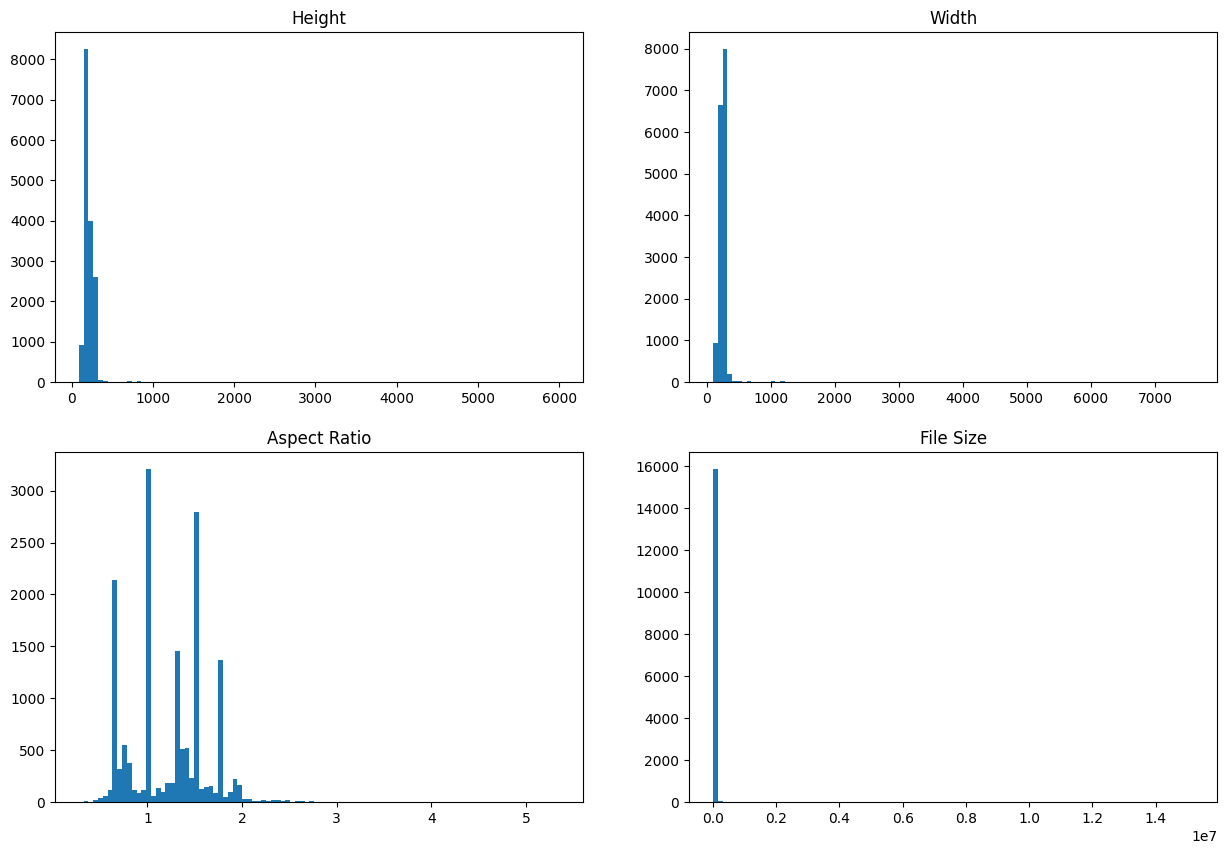

In [13]:
# plot the distribution of the height, width, aspect ratio and file size
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0, 0].hist(df['height'], bins=100)
ax[0, 0].set_title('Height')
ax[0, 1].hist(df['width'], bins=100)
ax[0, 1].set_title('Width') 
ax[1, 0].hist(df['aspect_ratio'], bins=100)
ax[1, 0].set_title('Aspect Ratio')
ax[1, 1].hist(df['file_size'], bins=100)
ax[1, 1].set_title('File Size')
plt.show()

/tmp/ipykernel_1496852/4177336716.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['height'][df['file_size'] > 1.229025e+04], bins=100, ax=ax[0, 0])
/tmp/ipykernel_1496852/4177336716.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['width'][df['file_size'] > 1.229025e+04], bins=100, 

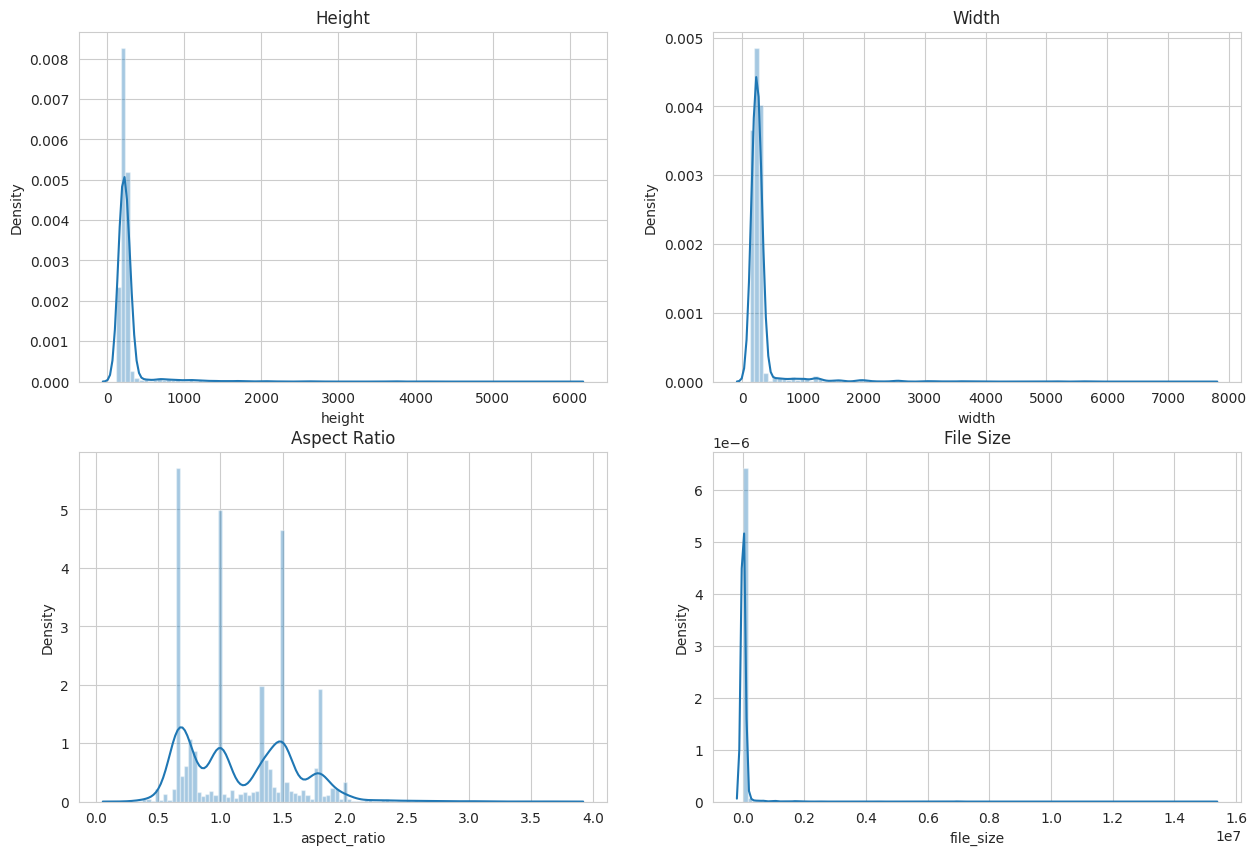

In [22]:
sns.set_style('whitegrid')

# plot the distribution of the height, width, aspect ratio and file size using seaborn
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.distplot(df['height'][df['file_size'] > 1.229025e+04], bins=100, ax=ax[0, 0])
ax[0, 0].set_title('Height')
sns.distplot(df['width'][df['file_size'] > 1.229025e+04], bins=100, ax=ax[0, 1])
ax[0, 1].set_title('Width')
sns.distplot(df['aspect_ratio'][df['file_size'] > 1.229025e+04], bins=100, ax=ax[1, 0])
ax[1, 0].set_title('Aspect Ratio')
sns.distplot(df['file_size'][df['file_size'] > 1.229025e+04], bins=100, ax=ax[1, 1])
ax[1, 1].set_title('File Size')
plt.show();

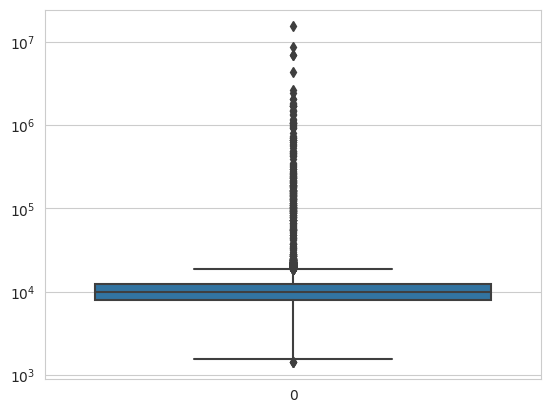

In [21]:
# boxplot of file size, use log scale to see the distribution
sns.boxplot(df['file_size'])
plt.yscale('log')

In [20]:
# show values of the file size on the fourth quartile
df[df['file_size'] > 1.229025e+04].sort_values(by='file_size', ascending=False)

,image,height,width,aspect_ratio,file_size
9346,6271bff0-6c6f-45d1-9847-e66665cb8c20.jpeg,4202,6300,1.499286,15188328
1606,4c8f6c91-b717-47a8-9926-92330c598ba1.jpeg,3744,5616,1.500000,8606543
11380,93b62280-9914-46e6-a77c-b612aa92aac4.jpeg,2160,3840,1.777778,6955403
14469,5423b923-474d-4218-85fb-3447ad76cdd8.jpeg,2500,2000,0.800000,6930048
8542,90fa6387-b4d7-41b3-806c-df4fab45f965.jpeg,5699,7599,1.333392,4369262
...,...,...,...,...,...
10024,a283e486-8d4d-4904-a970-d79c9dab434a.jpeg,203,248,1.221675,12294
14459,4683cbee-f1cd-43d3-bb7b-84b2fdcdc1fe.jpeg,225,225,1.000000,12293
14963,9b80350a-b56b-4181-9254-893beb864209.jpeg,183,275,1.502732,12293
6892,9de8d442-06b1-4d9c-a93e-c8d29b3586a2.jpeg,183,275,1.502732,12292


In [19]:
df.shape

(16000, 5)